In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

import tensorflow as tf
keras = tf.keras

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM

In [2]:
bdl_data = pd.read_csv('/kaggle/input/nse-defence-stocks-india/BDL.NS(2).csv', index_col='Date')

In [3]:
bdl_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-19,370.000000,402.700012,362.000000,389.799988,347.835297,3939659
2018-03-26,389.799988,414.600006,389.000000,396.649994,353.947876,1866655
2018-04-02,399.000000,402.000000,386.250000,390.750000,348.683014,486346
2018-04-09,392.000000,393.000000,372.299988,375.700012,335.253265,338510
2018-04-16,373.000000,421.899994,373.000000,415.600006,370.857788,1818906


<AxesSubplot:xlabel='Date'>

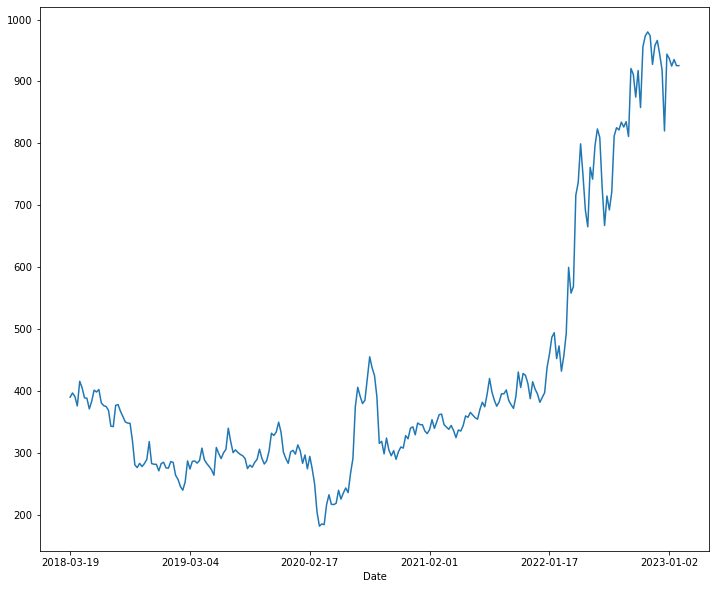

In [4]:
bdl_data['Close'].plot(figsize=(12,10))

In [7]:
bdl_data = bdl_data.dropna()

In [8]:
len(bdl_data)

255

In [9]:
scaled_bdl_data = scaler.fit_transform(bdl_data)

In [10]:
scaled_bdl_data.shape

(255, 6)

In [11]:
look_back = 6

bdl_data_generator = TimeseriesGenerator(scaled_bdl_data, scaled_bdl_data, length=look_back, batch_size=1)

In [12]:
bdl_model = Sequential()

n_features = scaled_bdl_data.shape[1]

bdl_model.add(LSTM(128, activation='relu', return_sequences=True , input_shape=(look_back,n_features)))
bdl_model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(look_back,n_features)))
bdl_model.add(LSTM(512, activation='relu',  input_shape=(look_back,n_features)))

bdl_model.add(Dense(n_features))

bdl_model.compile(optimizer='adam', loss='mse')

2023-02-03 13:11:04.417581: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
bdl_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 128)            69120     
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 256)            394240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               1574912   
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 2,041,350
Trainable params: 2,041,350
Non-trainable params: 0
_________________________________________________________________


In [14]:
bdl_model.fit(bdl_data_generator, epochs=500)

2023-02-03 13:14:01.313989: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
249/249 [==============================] - 13s 36ms/step - loss: 0.0285
Epoch 2/500
249/249 [==============================] - 9s 37ms/step - loss: 0.0089
Epoch 3/500
249/249 [==============================] - 9s 34ms/step - loss: 0.0066
Epoch 4/500
249/249 [==============================] - 9s 35ms/step - loss: 0.0061
Epoch 5/500
249/249 [==============================] - 9s 36ms/step - loss: 0.0069
Epoch 6/500
249/249 [==============================] - 9s 35ms/step - loss: 0.0058
Epoch 7/500
249/249 [==============================] - 9s 35ms/step - loss: 0.0060
Epoch 8/500
249/249 [==============================] - 9s 37ms/step - loss: 0.0051
Epoch 9/500
249/249 [==============================] - 8s 34ms/step - loss: 0.0062
Epoch 10/500
249/249 [==============================] - 9s 35ms/step - loss: 0.0049
Epoch 11/500
249/249 [==============================] - 9s 36ms/step - loss: 0.0051
Epoch 12/500
249/249 [==============================] - 9s 34ms/step - loss: 0.0048


In [15]:
bdl_model.save('/kaggle/working/bdl_model.h5')

<AxesSubplot:>

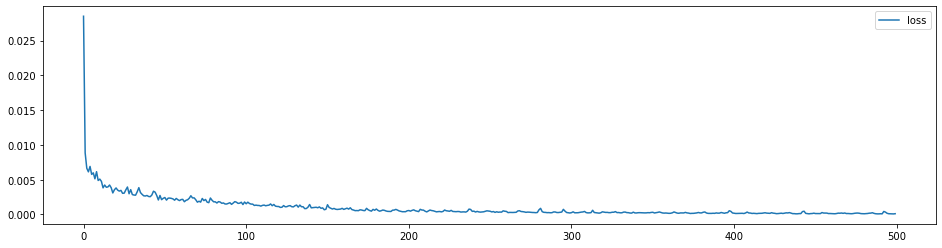

In [22]:
bdl_loss = pd.DataFrame(bdl_model.history.history)
bdl_loss.plot(figsize=(16,4))

In [24]:
# for exporting important objects of model
import joblib

# create PKL files of important objects required for project
# these are required for prediction of future stock prices and also for the flask app
joblib.dump(scaler, "/kaggle/working/scaler.pkl")
joblib.dump(scaled_bdl_data, "/kaggle/working/scaled_bdl_data.pkl")
joblib.dump(look_back, "/kaggle/working/look_back.pkl")


['/kaggle/working/look_back.pkl']

In [ ]:
# Load the model and the PKL files for prediction
# init_bdl_model = load_model('bdl_model.h5')
# init_scaler = joblib.load('Imp Objects/ini_scaler.pkl')
# init_look_back = joblib.load("Imp Objects/look_back.pkl")
# init_scaled_data = joblib.load("Imp Objects/scaled_data.pkl")

In [ ]:
# User inputs how many days into the future they want to predict
# n_days_to_predict = int(input("Enter the number of days you want to predict into the future: "))
# n_days_to_predict = 4

In [ ]:
# create the predictions
# n_features = scaled_data.shape[1]

# this array will contain the predictions
# forecast = []

# create batches of 31 days worth of data  starting from the last 31 days of the dataset
# first_eval_batch = scaled_data[-look_back:]

# reshape the batch to be fed into the model according to the model's input shape
# current_batch = first_eval_batch.reshape((1, look_back, n_features))

# loop for predicting the next day's stock price for n_days_to_predict entered above
# for i in range(n_days_to_predict):
     # predict the next day's stock price 32nd day's stock price in this case
#     current_pred = init_model.predict(current_batch)[0]
    # add the prediction to the forecast array
#     forecast.append(current_pred)
    # remove the very last day's data from the end of the batch and append the prediction to the batch
#     current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [ ]:
# inverse transform into original size
# true_forecast = scaler.inverse_transform(forecast)
# true_forecast

In [ ]:
# this function takes the model, scaler and number of days to predict as input
# and returns the predictions
# this function is used in the flask app
# and is exactly the same as the code above
# def return_predictions(model, scaler, num_days):
#     n_features = init_scaled_data.shape[1]

#     forecast = []

#     first_eval_batch = init_scaled_data[-init_look_back:]

#     current_batch = first_eval_batch.reshape((1, init_look_back, n_features))

#     for i in range(num_days):
#         current_pred = init_model.predict(current_batch)[0]

#         forecast.append(current_pred)

#         current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
#     true_forecast = init_scaler.inverse_transform(forecast)
#     # return true_forecast
#     return true_forecast

In [ ]:
# calling the function to get the predictions and storing it in a variable
# pred = (return_predictions(init_model, init_scaler, 1))[0][1].round(3)
# pred